# LIBRARIES

In [39]:
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Reading datas

In [2]:
data = pd.read_csv("data.csv")

In [3]:
pd.read_csv("sample_submission.csv")

,id,x_e_out [-]
0,4,0.0
1,7,0.0
2,10,0.0
3,12,0.0
4,23,0.0
...,...,...
10410,31633,0.0
10411,31634,0.0
10412,31637,0.0
10413,31640,0.0


In [4]:
data

,id,author,geometry,pressure [MPa],mass_flux [kg/m2-s],x_e_out [-],D_e [mm],D_h [mm],length [mm],chf_exp [MW/m2]
0,0,Thompson,tube,7.00,3770.0,0.1754,NaN,10.8,432.0,3.6
1,1,Thompson,tube,NaN,6049.0,-0.0416,10.3,10.3,762.0,6.2
2,2,Thompson,NaN,13.79,2034.0,0.0335,7.7,7.7,457.0,2.5
3,3,Beus,annulus,13.79,3679.0,-0.0279,5.6,15.2,2134.0,3.0
4,4,NaN,tube,13.79,686.0,NaN,11.1,11.1,457.0,2.8
...,...,...,...,...,...,...,...,...,...,...
31639,31639,Thompson,NaN,NaN,1736.0,0.0886,NaN,7.8,591.0,2.3
31640,31640,NaN,NaN,13.79,NaN,NaN,4.7,4.7,NaN,3.9
31641,31641,Thompson,NaN,18.27,658.0,-0.1224,3.0,3.0,150.0,2.3
31642,31642,Thompson,tube,6.89,3825.0,NaN,23.6,23.6,1972.0,3.7


<Axes: >

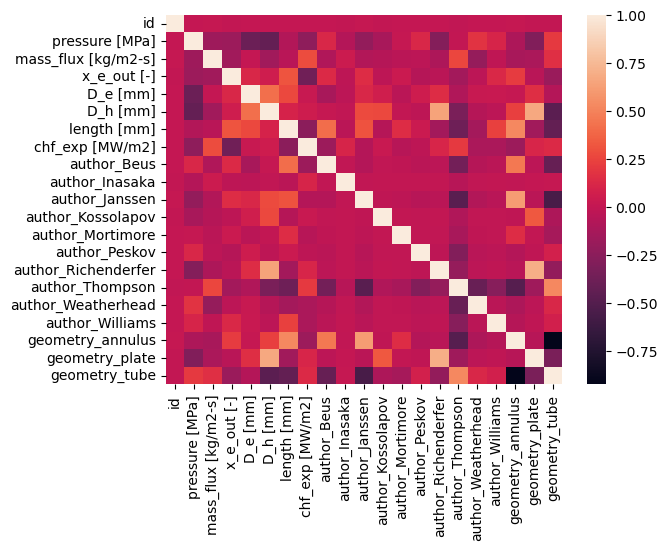

In [59]:
sns.heatmap(data.corr(),annot=False)

# Functions

In [5]:
def check_missing(feature):
    return feature.isnull().sum()

In [6]:
def filling_datas(feature,way):
    feature.fillna(way,inplace=True)

# TRAIN TEST

# FILLING

## 1) Author ## 

In [7]:
#filling_datas(data_train["author"],"Unknown")
#filling_datas(data_test["author"],"Unknown")
filling_datas(data["author"],"Thompson")


## 2) Geometry

In [8]:
#filling_datas(data_train["geometry"],data_train["geometry"].mode()[0])
#filling_datas(data_test["geometry"],data_train["geometry"].mode()[0])
filling_datas(data["geometry"],data["geometry"].mode()[0])

In [9]:
data = pd.get_dummies(data)

## 3) pressure [MPa] ##

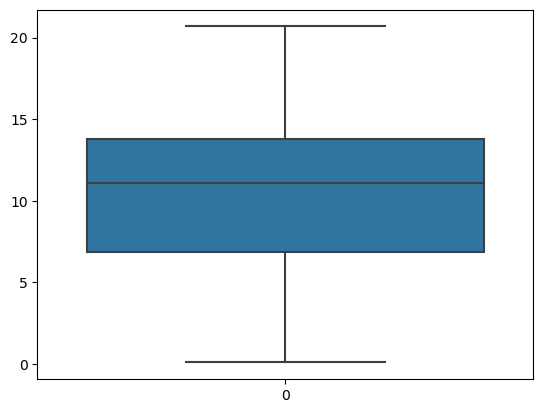

In [10]:
#pressure [MPa]
sns.boxplot(data["pressure [MPa]"])
#filling_datas(data_train["pressure [MPa]"],data_train["pressure [MPa]"].mean())
#filling_datas(data_test["pressure [MPa]"],data_train["pressure [MPa]"].mean())
filling_datas(data["pressure [MPa]"],data["pressure [MPa]"].mean())

## 4) mass_flux [kg/m2-s] ##

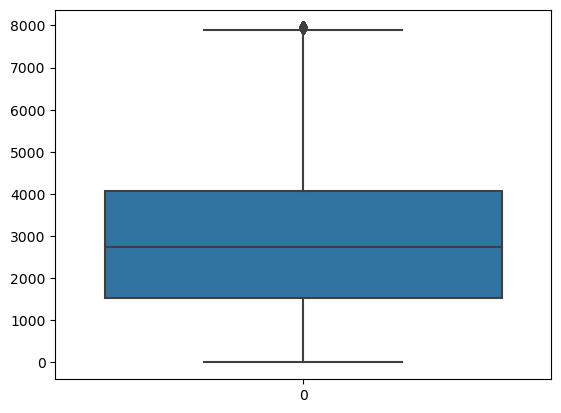

In [11]:
#mass_flux [kg/m2-s]
sns.boxplot(data["mass_flux [kg/m2-s]"])
#filling_datas(data_train["mass_flux [kg/m2-s]"],data_train["mass_flux [kg/m2-s]"].mean())
#filling_datas(data_test["mass_flux [kg/m2-s]"],data_train["mass_flux [kg/m2-s]"].mean())
filling_datas(data["mass_flux [kg/m2-s]"],data["mass_flux [kg/m2-s]"].mean())

## 5)D_e [mm]## 

<Axes: >

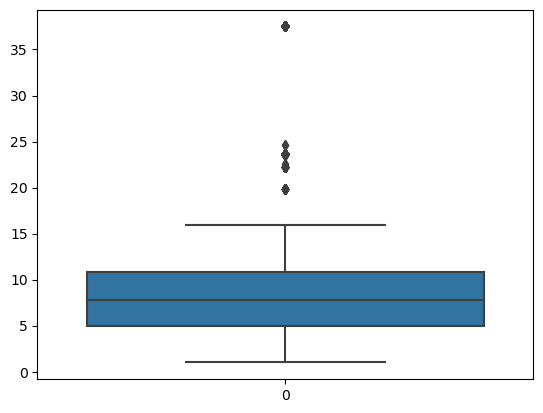

In [12]:
#D_e [mm]
sns.boxplot(data["D_e [mm]"])

In [13]:
q1 = data['D_e [mm]'].quantile(0.25)
q3 = data['D_e [mm]'].quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr

In [14]:
filling_datas(data["D_e [mm]"],data["D_e [mm]"].mean())

## 6) D_h [mm]] ##

<Axes: >

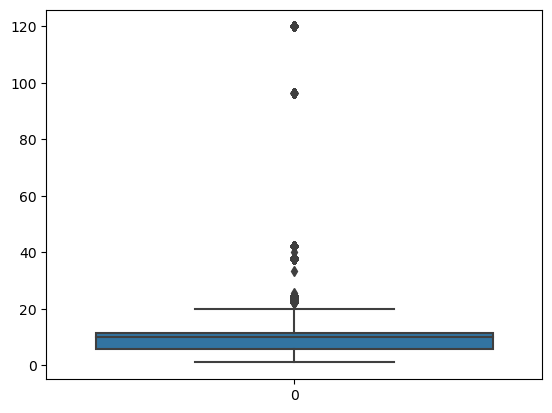

In [15]:
sns.boxplot(data["D_h [mm]"])

In [16]:
q1_1 = data['D_h [mm]'].quantile(0.25)
q3_1 = data['D_h [mm]'].quantile(0.75)
iqr_1 = q3_1 - q1_1
upper_bound_1 = q3_1 + 1.5 * iqr_1
lower_bound_1 = q1_1 - 1.5 * iqr_1

In [17]:
#data["D_h [mm]"] = data["D_h [mm]"].fillna(0)
#data = data[data["D_h [mm]"] < upper_bound_1]
#data["D_h [mm]"].loc[data["D_h [mm]"] == 0] = np.NaN
#filling_datas(data["D_h [mm]"],data["D_h [mm]"].mean())

In [18]:
filling_datas(data["D_h [mm]"],data["D_h [mm]"].mean())

## 7) length [mm] ##

<Axes: >

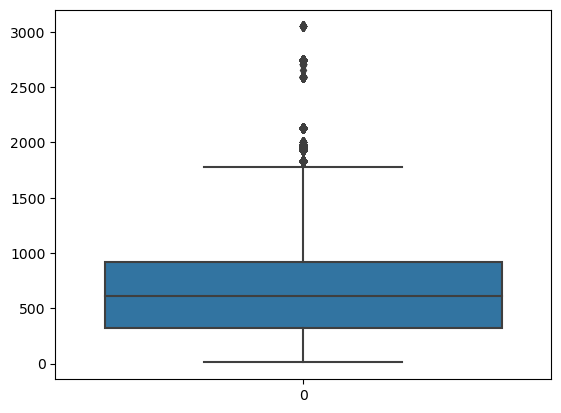

In [19]:
sns.boxplot(data["length [mm]"])

In [20]:
q1_2 = data["length [mm]"].quantile(0.25)
q3_2 = data["length [mm]"].quantile(0.75)
iqr_2 = q3_2 - q1_2
upper_bound_2 = q3_2 + 1.5 * iqr_2
lower_bound_2 = q1_2 - 1.5 * iqr_2

In [21]:
filling_datas(data["length [mm]"],data["length [mm]"].mean())

In [22]:
data_train = data[~data["x_e_out [-]"].isnull()]
data_test = data[data["x_e_out [-]"].isnull()]

In [23]:
X = data_train.drop(["x_e_out [-]","id"],axis=1)
y = data_train["x_e_out [-]"]

In [24]:
X_train, X_test , y_train,y_test = train_test_split(X,y,train_size=0.2,random_state=42)

In [25]:
model = CatBoostRegressor(verbose=0)

In [26]:
params = {
    'learning_rate': np.arange(0.01,1,0.01),
    'iterations': [30,60,90],}
grid = GridSearchCV(estimator=model, param_grid=params, cv=5,n_jobs=-1,verbose=0)


AttributeError: 'numpy.ndarray' object has no attribute 'head'

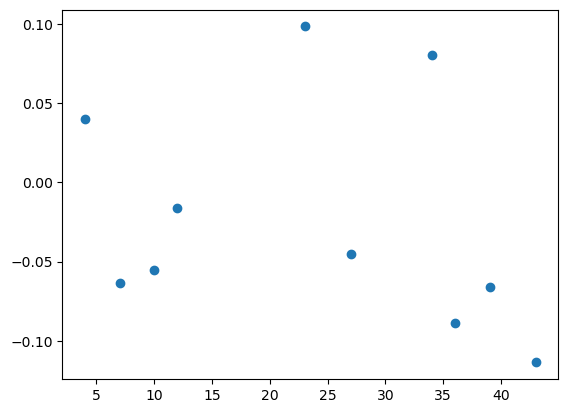

In [55]:
plt.scatter(x= data_test["id"].head(10),y = data_test["x_e_out [-]"].head(10))
plt.plot(np.array(predict_sub).head(10),color="red")
plt.show()

In [27]:
grid.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
best_params = grid.best_params_

In [ ]:
best_params

In [28]:
model_new = CatBoostRegressor(depth=8,iterations=60,learning_rate=0.23,verbose=0)
model_new.fit(X_train, y_train)

# Predict the target values for the test set using the CatBoost regressor
y_pred = model_new.predict(X_test)

In [29]:
mean_squared_error(y_test,y_pred,squared=True)

0.005946536125331416

In [30]:
X = data_train.drop(["x_e_out [-]","id"],axis=1)
y = data_train["x_e_out [-]"]

In [31]:
X_test_test = data_test.drop(["x_e_out [-]","id"],axis=1)
y_test_test = data_test["x_e_out [-]"]

In [41]:
 predict_sub = model_new.predict(X_test_test)

In [33]:
data_test["x_e_out [-]"] = model_new.predict(X_test_test)

/var/folders/_k/s2qr3ycs38x1x23h2b9wswr80000gn/T/ipykernel_35584/581851056.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test["x_e_out [-]"] = model_new.predict(X_test_test)


In [34]:
dicti = {"id":data_test["id"],
        "x_e_out [-]":data_test["x_e_out [-]"]} 

In [35]:
a = pd.DataFrame(dicti)

In [36]:
a.to_csv("submission.csv",index=False)

In [37]:
a

,id,x_e_out [-]
4,4,0.039980
7,7,-0.063251
10,10,-0.055057
12,12,-0.016206
23,23,0.098392
...,...,...
31633,31633,0.061798
31634,31634,-0.050476
31637,31637,0.050796
31640,31640,-0.091484
